In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [3]:
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)  # width, height in inches

# Set default font sizes
plt.rcParams['font.size'] = 15  # Default font size
plt.rcParams['axes.titlesize'] = 15  # Title font size
plt.rcParams['axes.labelsize'] = 15  # Label font size
plt.rcParams['xtick.labelsize'] = 15  # x-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15  # Legend font size
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [4]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/suppfigure_continuous_vs_discrete_noavgpopdrift'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


/mnt/home/szheng/ceph/place_variability/fig/paper/suppfigure_continuous_vs_discrete_noavgpopdrift made!


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [6]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

In [7]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

# pf_params_all = prepped_data_agg['pf_params_all']
# all_fields_all = prepped_data_agg['all_fields_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 



In [8]:
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

# individual neuron, diff in rate/loc, mean across trial pairs, sudden or gradual

In [252]:
pf_params_all = prepped_data_agg['pf_params_all']

In [257]:
key_l =['fr_peak','peak']
for key in key_l:
    
    fr_peak_peak_all_unstack = pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),key)]
#     sub=fr_peak_peak_all_unstack.sample(1).iloc[0]
#     ani,sess,ti,tt,uid,field_id = sub.name
#     sub=sub.unstack(-1).T.dropna(axis=1)

In [ ]:
# have done peak, not fr_peak yet!!!!!

In [259]:
dist_pertrpair_key_all = fr_peak_peak_all_unstack.groupby(level=(0,1,2,3,4,5)).apply(pvca.dist_one_df)

In [263]:
%%time
dist_perlag_key_all=dist_pertrpair_key_all.groupby(level=(0,1,2,3,4,5)).apply(pvca.get_val_per_lag)

CPU times: user 1min 10s, sys: 317 ms, total: 1min 11s
Wall time: 1min 11s


In [266]:
dist_key_perfield = dist_perlag_key_all.groupby(level=(0,1,2,3,4,5)).mean()

In [268]:
%%time
gpb = dist_key_perfield.groupby(level=(0,1,2,3),sort=False)
r2_df_d_all = []
for k,val in gpb:
    r2_df_d = svga.fit_poly_regress_cpd_get_r2_all_multi_order(val,cost='l2',min_size=2,ncpt_max=3)
#     r2_df_d_all[k] = r2_df_d
    if r2_df_d is not None:
        r2_df_d_all.append(r2_df_d) 
r2_df_d_all = pd.concat(r2_df_d_all,axis=0)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1-np.var(xx - xx_pwc) / np.var(xx)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1-np.var(xx - xx_pwc) / np.var(xx)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/p

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1-np.var(xx - xx_pwc) / np.var(xx)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1-np.var(xx - xx_pwc) / np.var(xx)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/p

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1-np.var(xx - xx_pwc) / np.var(xx)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1-np.var(xx - xx_pwc) / np.var(xx)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/p

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1-np.var(xx - xx_pwc) / np.var(xx)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py:21: RuntimeWarning: invalid value encountered in scalar divide
  r2 = 1-np.var(xx - xx_pwc) / np.var(xx)
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/projects/p

CPU times: user 1min 47s, sys: 49.2 ms, total: 1min 48s
Wall time: 1min 48s


In [271]:
fn_full = os.path.join(data_dir,'peakmse_avgtrpair_poly_regression_vs_step_r2_all.p')
pickle.dump(r2_df_d_all,open(fn_full,'wb'))
# r2_df_d_all = pickle.load(open(fn_full,'rb'))

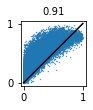

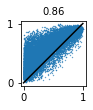

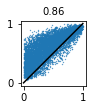

In [272]:
# fig,axs=plt.subplots(5,1,figsize=(4,20))
dosave = True#False
for ii,order in enumerate(r2_df_d_all.columns.get_level_values(0).unique()):
#     fig,ax=plt.subplots(figsize=(3,3))
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    ax.set_aspect('equal')
    ax.scatter(r2_df_d_all.loc[:,(order,'reg')],r2_df_d_all.loc[:,(order,'step')],s=0.1,marker='o')
    frac_step_larger=(r2_df_d_all.loc[:,(order,'step_minus_reg')].dropna() > 0).mean()
    ax.plot([0,1],[0,1],c='k')
#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac_step_larger:.2f}')
    # to use the png version, get rid of as much text as possible
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
    ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
#     ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    
#     ax.set_xlabel('R2 polynomial regression')
#     ax.set_ylabel('R2 change point model')
    if dosave:
        figfn = f'peakmse_avgtrpair_scatter_R2_cpd_vs_polyreg_order{order}'
        ph.save_given_name(fig,figfn,figdir,dpi=900)


In [ ]:
# fig,axs=plt.subplots(2,1,figsize=(2,4))
# for ii,key in enumerate(key_l):
#     ax=axs[ii]
#     row = sub.loc[key]
#     diff_mat = pd.DataFrame(row.values[None,:] - row.values[:,None],index=row.index,columns=row.index)
#     diff_mat_abs= np.abs(diff_mat)
#     diff_abs_per_lag = pvca.get_val_per_lag(diff_mat_abs)
# #     ph.mean_error_plot(diff_abs_per_lag,ax=ax,fig=fig)
    
#     row.plot(ax=ax,marker='o')
    
#     ax.set_title(key)
#     sns.despine()
# plt.tight_layout()
# rm = fr_map_trial_df_all.loc[(ani,sess,ti,tt,uid),:].dropna(axis=1).T

# st,ed = all_fields_all.loc[ani,sess,ti,tt,uid,field_id][['start','end']]

# ph.ratemap_one_raw(rm,field_bound=(st,ed))


# individual neuron, ratemap corr, mean across trial pairs, sudden or gradual?

In [186]:
pc_ind_l = []
for ind in all_fields_recombined_all.index:
    if ind[3]=='both':
        pc_ind_l.append((ind[0],ind[1],ind[2],0,ind[4]))
        pc_ind_l.append((ind[0],ind[1],ind[2],1,ind[4]))
    else:
        pc_ind_l.append((ind[0],ind[1],ind[2],ind[3],ind[4]))
pc_ind_l = pd.MultiIndex.from_tuples(pc_ind_l)

# select place cells
fr_map_trial_df_pc = fr_map_trial_df_all.unstack(level=-1).loc[pc_ind_l].stack()

In [187]:
%%time
gpb=fr_map_trial_df_pc.groupby(level=(0,1,2,3,4))
rmcorr_per_neuron = gpb.corr()

CPU times: user 4.06 s, sys: 123 ms, total: 4.18 s
Wall time: 4.18 s


In [188]:
%%time
corr_all = {}
corr_per_lag_all = {}
for k,val in gpb:
    corr_one =val.corr().dropna(axis=1,how='all').dropna(axis=0,how='all')
    corr_all[k] = corr_one
    corr_per_lag_one = pvca.get_val_per_lag(corr_one)
    corr_per_lag_all[k] = corr_per_lag_one
corr_all = pd.concat(corr_all,axis=0)
corr_per_lag_all = pd.concat(corr_per_lag_all,axis=0)

CPU times: user 1min 20s, sys: 635 ms, total: 1min 20s
Wall time: 1min 20s


In [192]:
# corr_per_lag_per_sess=corr_per_lag_all.groupby(level=(0,1,2)).mean()
corr_per_lag_per_sess_per_trpair_per_neuron=corr_per_lag_all.groupby(level=(0,1,2,3,4)).mean()

In [194]:
corr_per_lag_per_sess_per_trpair_per_neuron

1         2         3         4   \
e13_16f1 e13_16f1_210302 0 0.0 7.0    0.519742  0.458300  0.399320  0.378884   
                               8.0    0.505559  0.512566  0.443927  0.408269   
                               9.0    0.680681  0.637943  0.620679  0.587263   
                               11.0   0.532101  0.500601  0.391141  0.379655   
                               12.0   0.694690  0.661688  0.680905  0.588639   
...                                        ...       ...       ...       ...   
e16_3m2  e16_3m2_211213  1 1.0 200.0  0.175280  0.129129  0.272124  0.187353   
                               201.0  0.785786  0.707402  0.616852  0.553220   
                               203.0  0.900200  0.900649  0.878849  0.855420   
                               206.0  0.250879  0.168442  0.243589  0.239174   
                               207.0  0.594817  0.503004  0.643074  0.607100   

                                            5         6         7         8   \
e13_16f1 e13_16f1_210302 0 0.0 7.0    0.332154  0.304454  0.433865  0.385864   
                               8.0    0.470111  0.437735  0.376902  0.355738   
                               9.0    0.481567  0.399351  0.390235  0.302623   
                               11.0   0.268852  0.204305  0.053725  0.065280   
                               12.0   0.657169  0.606461  0.588200  0.552399   
...                                        ...       ...       ...       ...   
e16_3m2  e16_3m2_211213  1 1.0 200.0  0.195109  0.136730  0.014310  0.303628   
                               201.0  0.598415  0.540528  0.504732  0.311121   
                               203.0  0.875044  0.825723  0.833687  0.820656   
                               206.0  0.077753  0.225179  0.330856 -0.071715   
                               207.0  0.476943  0.484831  0.527012  0.457862   

                                            9         10  ...  26  27  28  29  \
e13_16f1 e13_16f1_210302 0 0.0 7.0    0.499011  0.504799  ... NaN NaN NaN NaN   
                               8.0    0.432581  0.230036  ... NaN NaN NaN NaN   
                               9.0    0.086717  0.142637  ... NaN NaN NaN NaN   
                               11.0   0.048880  0.035544  ... NaN NaN NaN NaN   
                               12.0   0.498482  0.527204  ... NaN NaN NaN NaN   
...                                        ...       ...  ...  ..  ..  ..  ..   
e16_3m2  e16_3m2_211213  1 1.0 200.0  0.027834 -0.117861  ... NaN NaN NaN NaN   
                               201.0  0.195926  0.126197  ... NaN NaN NaN NaN   
                               203.0  0.768507  0.774393  ... NaN NaN NaN NaN   
                               206.0  0.272761  0.196872  ... NaN NaN NaN NaN   
                               207.0  0.495237  0.433837  ... NaN NaN NaN NaN   

                                      30  31  32  33  34  35  
e13_16f1 e13_16f1_210302 0 0.0 7.0   NaN NaN NaN NaN NaN NaN  
                               8.0   NaN NaN NaN NaN NaN NaN  
                               9.0   NaN NaN NaN NaN NaN NaN  
                               11.0  NaN NaN NaN NaN NaN NaN  
                               12.0  NaN NaN NaN NaN NaN NaN  
...                                   ..  ..  ..  ..  ..  ..  
e16_3m2  e16_3m2_211213  1 1.0 200.0 NaN NaN NaN NaN NaN NaN  
                               201.0 NaN NaN NaN NaN NaN NaN  
                               203.0 NaN NaN NaN NaN NaN NaN  
                               206.0 NaN NaN NaN NaN NaN NaN  
                               207.0 NaN NaN NaN NaN NaN NaN  

[9630 rows x 35 columns]

In [196]:
r2_df_d

1                           \
                                           reg      step step_minus_reg   
e13_26m1 e13_26m1_211116 0 1.0 5.0    0.856753  0.749974      -0.106779   
                               11.0   0.580945  0.902428       0.321484   
                               13.0   0.082866  0.205332       0.122465   
                               16.0   0.311856  0.649828       0.337973   
                               17.0   0.474043  0.897172       0.423128   
...                                        ...       ...            ...   
                               201.0  0.106421  0.486873       0.380452   
                               202.0  0.346167  0.340991      -0.005176   
                               206.0  0.722126  0.772981       0.050855   
                               207.0  0.635068  0.717185       0.082117   
                               208.0  0.090510  0.463614       0.373104   

                                             2                           
                                           reg      step step_minus_reg  
e13_26m1 e13_26m1_211116 0 1.0 5.0    0.864382  0.931167       0.066785  
                               11.0   0.732529  0.904648       0.172119  
                               13.0   0.315347  0.294898      -0.020449  
                               16.0   0.826035  0.703586      -0.122449  
                               17.0   0.538514  0.930511       0.391997  
...                                        ...       ...            ...  
                               201.0  0.581287  0.636083       0.054796  
                               202.0  0.346617  0.462467       0.115850  
                               206.0  0.746965  0.800287       0.053322  
                               207.0  0.725318  0.887556       0.162238  
                               208.0  0.834272  0.809364      -0.024908  

[118 rows x 6 columns]

In [209]:
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

In [210]:
%%time
gpb = corr_per_lag_per_sess_per_trpair_per_neuron.groupby(level=(0,1,2,3),sort=False)
r2_df_d_all = []
for k,val in gpb:
    r2_df_d = svga.fit_poly_regress_cpd_get_r2_all_multi_order(val,cost='l2',min_size=2,ncpt_max=3)
#     r2_df_d_all[k] = r2_df_d
    if r2_df_d is not None:
        r2_df_d_all.append(r2_df_d) 
r2_df_d_all = pd.concat(r2_df_d_all,axis=0)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/sel

CPU times: user 1min 4s, sys: 40.2 ms, total: 1min 4s
Wall time: 1min 4s


In [213]:
fn_full = os.path.join(data_dir,'ratemap_avgtrpair_poly_regression_vs_step_r2_all.p')
pickle.dump(r2_df_d_all,open(fn_full,'wb'))
# r2_df_d_all = pickle.load(open(fn_full,'rb'))

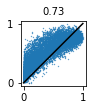

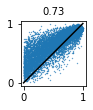

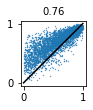

In [219]:
# fig,axs=plt.subplots(5,1,figsize=(4,20))
dosave = True#False
for ii,order in enumerate(r2_df_d_all.columns.get_level_values(0).unique()):
#     fig,ax=plt.subplots(figsize=(3,3))
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    ax.set_aspect('equal')
    ax.scatter(r2_df_d_all.loc[:,(order,'reg')],r2_df_d_all.loc[:,(order,'step')],s=0.1,marker='o')
    frac_step_larger=(r2_df_d_all.loc[:,(order,'step_minus_reg')].dropna() > 0).mean()
    ax.plot([0,1],[0,1],c='k')
#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac_step_larger:.2f}')
    # to use the png version, get rid of as much text as possible
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
    ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
#     ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    
#     ax.set_xlabel('R2 polynomial regression')
#     ax.set_ylabel('R2 change point model')
    if dosave:
        figfn = f'ratemap_avgtrpair_scatter_R2_cpd_vs_polyreg_order{order}'
        ph.save_given_name(fig,figfn,figdir,dpi=900)


# fit all sessions

In [9]:
import step_vs_gradual_analysis as svga
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

In [21]:
%%time
gpb = X_raw_all.groupby(level=(0,1,2,3),sort=False)
r2_df_d_all = []
for k,val in gpb:
    r2_df_d = svga.fit_poly_regress_cpd_get_r2_all_multi_order(val,cost='l2',min_size=2,ncpt_max=5)
#     r2_df_d_all[k] = r2_df_d
    r2_df_d_all.append(r2_df_d) 
r2_df_d_all = pd.concat(r2_df_d_all,axis=0)

CPU times: user 3min 40s, sys: 47.7 ms, total: 3min 40s
Wall time: 3min 40s


In [32]:
# r2_df_d_all=r2_df_d_all.droplevel((0,1,2,3))

In [10]:
fn_full = os.path.join(data_dir,'poly_regression_vs_step_r2_all.p')
# pickle.dump(r2_df_d_all,open(fn_full,'wb'))
r2_df_d_all = pickle.load(open(fn_full,'rb'))

/tmp/ipykernel_2060823/1321363207.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
/tmp/ipykernel_2060823/1321363207.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)


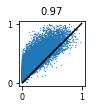

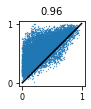

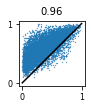

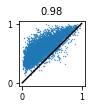

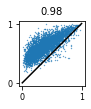

In [71]:
# fig,axs=plt.subplots(5,1,figsize=(4,20))
dosave = True
for ii,order in enumerate(r2_df_d_all.columns.get_level_values(0).unique()):
#     fig,ax=plt.subplots(figsize=(3,3))
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    ax.set_aspect('equal')
    ax.scatter(r2_df_d_all.loc[:,(order,'reg')],r2_df_d_all.loc[:,(order,'step')],s=0.1,marker='o')
    frac_step_larger=(r2_df_d_all.loc[:,(order,'step_minus_reg')].dropna() > 0).mean()
    ax.plot([0,1],[0,1],c='k')
#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac_step_larger:.2f}')
    # to use the png version, get rid of as much text as possible
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
    ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
    ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_xlabel('R2 polynomial regression')
#     ax.set_ylabel('R2 change point model')
    if dosave:
        figfn = f'scatter_R2_cpd_vs_polyreg_order{order}'
        ph.save_given_name(fig,figfn,figdir,dpi=900)


# look at one session

In [14]:
ani='e15_13f1'
sess='e15_13f1_220117'
ta,tt = 0,0
X_raw_one = X_raw_all.loc[(ani,sess,ta,tt),:]

changes_df_one=changes_df_all.loc[(ani,sess,ta,tt),:]

ma=((changes_df_one==1).sum(axis=1)==1) & ((changes_df_one==-1).sum(axis=1)==1)
ii=0
uid,field_id=changes_df_one.loc[ma].index[ii]

r2_df_d_one = r2_df_d_all.loc[(ani,sess,ta,tt),:]

best_n_one = best_n_all_test.loc[ani,sess,ta,tt]
fr_map_trial_df_one=fr_map_trial_df_all.loc[(ani,sess,ta,tt),:].dropna(axis=1,how='all')
all_fields_one=all_fields_recombined_all.loc[(ani,sess,ta,tt),:]
all_sw_d_one=all_sw_d_all.loc[(ani,sess,ta),:].set_index(['trialtype','uid','field_index']).loc[tt]

/tmp/ipykernel_2060823/1072487391.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw_one = X_raw_all.loc[(ani,sess,ta,tt),:]
/tmp/ipykernel_2060823/1072487391.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df_one=changes_df_all.loc[(ani,sess,ta,tt),:]
/tmp/ipykernel_2060823/1072487391.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  r2_df_d_one = r2_df_d_all.loc[(ani,sess,ta,tt),:]
/tmp/ipykernel_2060823/1072487391.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n_one = best_n_all_test.loc[ani,sess,ta,tt]
/tmp/ipykernel_2060823/1072487391.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df_one=fr_map_trial_df_all.loc[(ani,sess,ta,tt),:].dropna(axis=1,how='all')
/tmp/ipykernel_2060823/1072487391.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_one=all_field

In [15]:
# add si to all_sw
si_l = []
for i,row in all_sw_with_metrics_d_all.iterrows():
    si_l.append(per_field_metrics_all.loc[(i[0],i[1],i[2],row['trialtype'],row['uid']),:]['si'].mean())
si_l = np.array(si_l)
all_sw_with_metrics_d_all['si'] = si_l

/tmp/ipykernel_2060823/2076179227.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  si_l.append(per_field_metrics_all.loc[(i[0],i[1],i[2],row['trialtype'],row['uid']),:]['si'].mean())


In [16]:
ta=0
all_sw_with_metrics_one=all_sw_with_metrics_d_all.loc[ani,sess,ta]

/tmp/ipykernel_2060823/3875779715.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_one=all_sw_with_metrics_d_all.loc[ani,sess,ta]


## select examples

In [17]:
# initialize the holder of example indices
tt_uid_field_id_order_l = []

# selecting one ON
ta=0
tt=0
best_n_one = best_n_all_test.loc[ani,sess,ta,tt]
ma=best_n_one==1
ii=0
uid,field_id = best_n_one.index[ma][ii]

tt_uid_field_id_order_l.append((tt,uid,field_id,1))


/tmp/ipykernel_2060823/1711155876.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n_one = best_n_all_test.loc[ani,sess,ta,tt]


In [18]:
# selecting first on then off
si_thresh = 0.5
gpb=all_sw_with_metrics_one.groupby(['trialtype','uid','field_index'])
uid_satisfying_cond = []
for k,val in gpb:
    cond = ((val['switch']==1).sum()==1) & ((val['switch']==-1).sum()==1) & (val['si'].mean() > si_thresh)
    if cond:
        if val.query('switch==1')['trial_index'].iloc[0] < val.query('switch==-1')['trial_index'].iloc[0]:
#             uid_satisfying_cond[k] = val
            uid_satisfying_cond.append(k)
tt,uid,field_id = uid_satisfying_cond[5]
tt_uid_field_id_order_l.append((tt,uid,field_id,2))


In [19]:
# selecting first off then on
si_thresh = 0.5
gpb=all_sw_with_metrics_one.groupby(['trialtype','uid','field_index'])
uid_satisfying_cond = []
for k,val in gpb:
    cond = ((val['switch']==1).sum()==1) & ((val['switch']==-1).sum()==1) & (val['si'].mean() > si_thresh)
    if cond:
        if val.query('switch==1')['trial_index'].iloc[0] > val.query('switch==-1')['trial_index'].iloc[0]:
#             uid_satisfying_cond[k] = val
            uid_satisfying_cond.append(k)
ii=2
tt,uid,field_id = uid_satisfying_cond[ii]
order=2
tt_uid_field_id_order_l.append((tt,uid,field_id,order))


In [20]:
# selecting 3 change points
si_thresh = 0.5
gpb=all_sw_with_metrics_one.groupby(['trialtype','uid','field_index'])
uid_satisfying_cond = []
for k,val in gpb:
    cond = len(val)==3
    if cond:
        uid_satisfying_cond.append(k)
ii=0
tt,uid,field_id = uid_satisfying_cond[ii]
order=3
tt_uid_field_id_order_l.append((tt,uid,field_id,order))


In [68]:
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

/tmp/ipykernel_2060823/3725456382.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_2060823/3725456382.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
/tmp/ipykernel_2060823/3725456382.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/3725456382.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc=X_pwc_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/3725456382.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d=all_sw_d_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/3725456382.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  trial_index_to_index_within_df = dpp.trial_index_to_index_withi

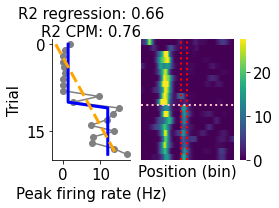

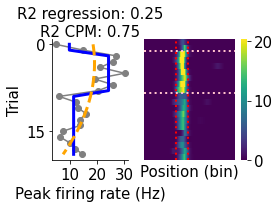

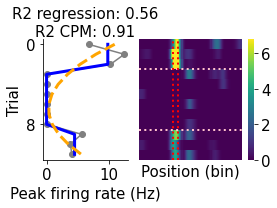

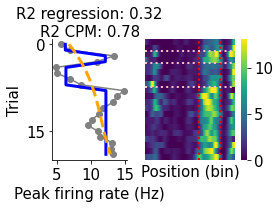

In [69]:
dosave = True
all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
all_fields_row_one=all_fields_recombined.loc[ta,tt,uid,field_id]

fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
X_raw = X_raw_all.loc[(ani,sess),:]
X_pwc=X_pwc_all.loc[(ani,sess),:]
all_sw_d=all_sw_d_all.loc[(ani,sess),:]
trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df_all.loc[(ani,sess),:])


for (tt,uid,field_id,order) in tt_uid_field_id_order_l:
    fig,axs=svga.fit_plot_step_vs_continuous_example(fr_map_trial_df,
                                            X_raw,X_pwc,all_sw_d,trial_index_to_index_within_df,
                                            all_fields_recombined,
                                            best_n_one,
                                            ncpts=order,ii=None,
                                            ta=ta,tt=tt,min_size=2,
                                                uid=uid,field_id=field_id,
                                                     dosave=dosave,
                                                     figdir=figdir,
                                                     sess=sess,
                                                     figsize=(4,3),
                                                     do_legend=False,
                                           )
    
#     axs[0].legend([]).remove()

# step vs continuous for the pv correlation curve

In [10]:
import pv_corr_analysis as pvca

In [11]:
corr_all=fr_map_trial_df_all.groupby(level=(0,1,2,3)).corr()
mean_corr_all=corr_all.groupby(level=(0,1,2,3)).apply(lambda x:pvca.get_val_per_lag(x).mean(axis=0))
mean_corr_all = mean_corr_all.unstack(level=-1)

In [188]:
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

In [87]:
# def mask_diagonal_with_na(val):
#     val_ = val.dropna(axis=1,how='all').dropna(axis=0,how='all')
#     mat = val_.dropna(axis=1,how='all').dropna(axis=0,how='all').values
#     mat[np.diag_indices_from(mat)] = np.nan
#     df = pd.DataFrame(mat,val_.index,val_.columns)
#     return df

def mask_prev_with_na(val):
    val_ = val.dropna(axis=1,how='all').dropna(axis=0,how='all')
    mat = val_.dropna(axis=1,how='all').dropna(axis=0,how='all').values
    mat[np.tril_indices_from(mat,k=0)] = np.nan
    
    df = pd.DataFrame(mat,val_.index,val_.columns)
    return df

In [86]:
corr_all

0         1         2         3   \
e13_16f1 e13_16f1_210302 0 0.0 0   1.000000  0.482536  0.360486  0.376881   
                               1   0.482536  1.000000  0.671062  0.664047   
                               2   0.360486  0.671062  1.000000  0.777029   
                               3   0.376881  0.664047  0.777029  1.000000   
                               4   0.380609  0.685434  0.700740  0.813369   
...                                     ...       ...       ...       ...   
e16_3m2  e16_3m2_211213  1 1.0 32       NaN       NaN       NaN       NaN   
                               33       NaN       NaN       NaN       NaN   
                               34       NaN       NaN       NaN       NaN   
                               35       NaN       NaN       NaN       NaN   
                               36       NaN       NaN       NaN       NaN   

                                         4         5         6         7   \
e13_16f1 e13_16f1_210302 0 0.0 0   0.380609  0.444476  0.398630  0.387467   
                               1   0.685434  0.686690  0.639350  0.657183   
                               2   0.700740  0.694087  0.668041  0.667668   
                               3   0.813369  0.763025  0.749615  0.720387   
                               4   1.000000  0.789336  0.731165  0.687846   
...                                     ...       ...       ...       ...   
e16_3m2  e16_3m2_211213  1 1.0 32       NaN       NaN       NaN       NaN   
                               33       NaN       NaN       NaN       NaN   
                               34       NaN       NaN       NaN       NaN   
                               35       NaN       NaN       NaN       NaN   
                               36       NaN       NaN       NaN       NaN   

                                         8         9   ...  27  28  29  30  \
e13_16f1 e13_16f1_210302 0 0.0 0   0.383815  0.399751  ... NaN NaN NaN NaN   
                               1   0.670983  0.639381  ... NaN NaN NaN NaN   
                               2   0.687224  0.661658  ... NaN NaN NaN NaN   
                               3   0.707388  0.677634  ... NaN NaN NaN NaN   
                               4   0.675912  0.648630  ... NaN NaN NaN NaN   
...                                     ...       ...  ...  ..  ..  ..  ..   
e16_3m2  e16_3m2_211213  1 1.0 32       NaN       NaN  ... NaN NaN NaN NaN   
                               33       NaN       NaN  ... NaN NaN NaN NaN   
                               34       NaN       NaN  ... NaN NaN NaN NaN   
                               35       NaN       NaN  ... NaN NaN NaN NaN   
                               36       NaN       NaN  ... NaN NaN NaN NaN   

                                   31  32  33  34  35  36  
e13_16f1 e13_16f1_210302 0 0.0 0  NaN NaN NaN NaN NaN NaN  
                               1  NaN NaN NaN NaN NaN NaN  
                               2  NaN NaN NaN NaN NaN NaN  
                               3  NaN NaN NaN NaN NaN NaN  
                               4  NaN NaN NaN NaN NaN NaN  
...                                ..  ..  ..  ..  ..  ..  
e16_3m2  e16_3m2_211213  1 1.0 32 NaN NaN NaN NaN NaN NaN  
                               33 NaN NaN NaN NaN NaN NaN  
                               34 NaN NaN NaN NaN NaN NaN  
                               35 NaN NaN NaN NaN NaN NaN  
                               36 NaN NaN NaN NaN NaN NaN  

[3996 rows x 37 columns]

In [88]:
# corr_all_diagma=corr_all.groupby(level=(0,1,2,3)).apply(lambda x:mask_diagonal_with_na(x)).droplevel((0,1,2,3))
corr_all_prevma=corr_all.groupby(level=(0,1,2,3)).apply(lambda x:mask_prev_with_na(x)).droplevel((0,1,2,3))




In [157]:
%%time
r2_df_pv = svga.fit_poly_regress_cpd_get_r2_all_multi_order(corr_all_prevma,cost='l2',min_size=2,ncpt_max=3)
r2_df_pv_all = copy.copy(r2_df_pv)



/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


CPU times: user 5.84 s, sys: 1.22 ms, total: 5.84 s
Wall time: 5.84 s


In [158]:
r2_df_pv_mean = r2_df_pv.groupby(level=(0,1,2,3)).mean()

/tmp/ipykernel_1868816/2001938668.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)


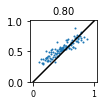

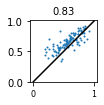

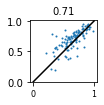

In [159]:
# fig,axs=plt.subplots(5,1,figsize=(4,20))
dosave = True
r2_df_pv = r2_df_pv_mean 
for ii,order in enumerate(r2_df_pv.columns.get_level_values(0).unique()):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    ax.set_aspect('equal')
    ax.scatter(r2_df_pv.loc[:,(order,'reg')],r2_df_pv.loc[:,(order,'step')],s=1)
    ax.plot([0.,1],[0.,1],color='k')
#     ax.set_xlim([0.6,1.01])
    ax.set_ylim([0.,1.01])
#     ax.set_xticks([0.6,1])
#     ax.set_yticks([0.6,1])
    
    frac_step_larger = (r2_df_pv.loc[:,(order,'step_minus_reg')].dropna() > 0).mean()
        
#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac:.2f}')
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
    ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_xlabel('R2 polynomial regression')
#     ax.set_ylabel('R2 change point model')
    if dosave:
        figfn = f'scatter_R2_cpd_vs_polyreg_order{order}_popveccorr'
#         ph.save_given_name(fig,figfn,figdir,dpi=900)


In [170]:
r2_df_pv_mean[(1,'step_minus_reg')].sort_values(ascending=False).head(30)

e13_16f1  e13_16f1_210331  0  0.0    0.295058
e16_1f1   e16_1f1_201004   0  1.0    0.259660
          e16_1f1_200923   0  1.0    0.240417
e14_2m3   e14_2m3_201206   0  1.0    0.234356
e15_9f1   e15_9f1_200723   0  0.0    0.229370
e14_2m3   e14_2m3_201206   0  0.0    0.228181
e13_16f1  e13_16f1_210314  0  0.0    0.216712
e15_10m1  e15_10m1_200803  0  0.0    0.209599
e15_13f1  e15_13f1_220120  1  1.0    0.204185
          e15_13f1_220118  0  1.0    0.200322
e15_10m1  e15_10m1_200812  0  1.0    0.182534
e16_1f1   e16_1f1_200918   0  0.0    0.179632
e15_10m1  e15_10m1_200812  0  0.0    0.178031
e13_16f1  e13_16f1_210317  0  0.0    0.175130
e15_10m1  e15_10m1_200803  0  1.0    0.172652
e13_26m1  e13_26m1_211019  0  0.0    0.172222
e15_10m1  e15_10m1_200727  0  0.0    0.170326
e14_2m3   e14_2m3_201121   0  1.0    0.167281
e16_1f1   e16_1f1_200918   0  1.0    0.165808
e15_10m1  e15_10m1_200727  0  1.0    0.163389
e14_2m3   e14_2m3_201118   0  0.0    0.163108
e13_16f1  e13_16f1_210322  0  0.0 

In [107]:
r2_step_minus_reg=r2_df_pv.loc[:,(order,'step_minus_reg')].dropna()
r2_step_minus_reg_with_ntrial=pd.concat([r2_step_minus_reg,ntrials_per_tt],axis=1).dropna(axis=0)
r2_step_minus_reg_with_ntrial=r2_step_minus_reg_with_ntrial.T.reset_index(drop=True).T
# ntrials_per_tt.loc[r2_step_minus_reg.index]

<Axes: xlabel='1', ylabel='0'>

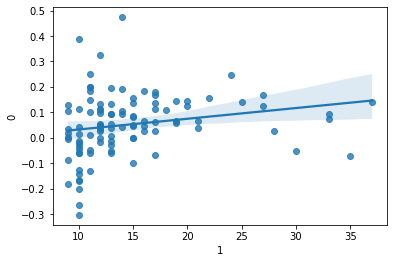

In [110]:
sns.regplot(data=r2_step_minus_reg_with_ntrial,x=r2_step_minus_reg_with_ntrial[1],y=r2_step_minus_reg_with_ntrial[0])

In [115]:
n_pyr_per_sess=subdb.groupby(['animal_name.1','sess_name'])['n_pyr_putative'].mean()

In [120]:
n_pyr_per_sess_to_align = n_pyr_per_sess.loc[r2_step_minus_reg_with_ntrial.reset_index(level=-1).index]
r2_step_minus_reg_with_ntrial['n_pyr'] = n_pyr_per_sess_to_align.values

<Axes: xlabel='n_pyr', ylabel='0'>

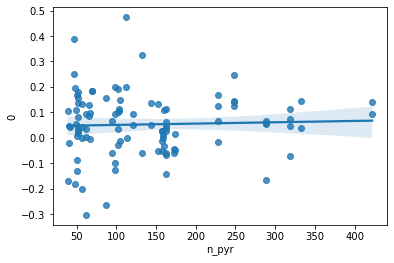

In [121]:
sns.regplot(data=r2_step_minus_reg_with_ntrial,x=r2_step_minus_reg_with_ntrial['n_pyr'],y=r2_step_minus_reg_with_ntrial[0])

In [75]:
# r2_df_pv = svga.fit_poly_regress_cpd_get_r2_all_multi_order(mean_corr_all,cost='l2',min_size=2,ncpt_max=5)

In [171]:
ani='e13_16f1'
sess='e13_16f1_210331'

In [172]:
r2_df_pv_all.loc[ani,sess]

1                                  2                           \
              reg      step step_minus_reg       reg      step step_minus_reg   
0 0.0 0  0.003767  0.185274       0.181507  0.180990  0.485286       0.304297   
      1  0.329415  0.508850       0.179435  0.406360  0.872594       0.466235   
      2  0.384271  0.572008       0.187738  0.593014  0.870617       0.277603   
      3  0.141362  0.443221       0.301859  0.299312  0.945826       0.646514   
      4  0.126519  0.463992       0.337473  0.629937  0.899372       0.269435   
      5  0.024273  0.359905       0.335632  0.541411  0.931207       0.389796   
      6  0.257377  0.679501       0.422124       NaN       NaN            NaN   
      7  0.449866  0.864560       0.414694       NaN       NaN            NaN   
  1.0 0  0.522254  0.567934       0.045680  0.522257  0.631788       0.109531   
      1  0.373024  0.475715       0.102691  0.377404  0.538218       0.160814   
      2  0.533906  0.632222       0.098315  0.607011  0.715185       0.108174   
      3  0.250817  0.371834       0.121016  0.350163  0.401840       0.051677   
      4  0.209508  0.361887       0.152379       NaN       NaN            NaN   
      5  0.008734  0.039422       0.030688       NaN       NaN            NaN   

                3                           
              reg      step step_minus_reg  
0 0.0 0  0.229077  0.524319       0.295242  
      1  0.578797  0.925231       0.346434  
      2  0.782499  0.971380       0.188882  
      3  0.478678  0.954077       0.475399  
      4       NaN       NaN            NaN  
      5       NaN       NaN            NaN  
      6       NaN       NaN            NaN  
      7       NaN       NaN            NaN  
  1.0 0  0.659001  0.632144      -0.026857  
      1  0.645861  0.550294      -0.095567  
      2       NaN       NaN            NaN  
      3       NaN       NaN            NaN  
      4       NaN       NaN            NaN  
      5       NaN       NaN            NaN

In [226]:
ta,tt=0,0
tr=1
xx=corr_all_prevma.loc[(ani,sess,ta,tt,tr),:].dropna(how='all').values

In [227]:
xx

array([0.70641722, 0.69604175, 0.68253102, 0.690844  , 0.63639651,
       0.6195219 , 0.37193371, 0.46574562, 0.66045128, 0.57790129])

In [228]:
ncpts = 1
r2_step,xx_hat_step=svga.fit_cpd_get_r2(xx,ncpts,cost='l2',min_size=2)
r2_reg,xx_hat_reg=svga.fit_poly_regress_get_r2(xx,order=ncpts,cost='l2',verbose=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     3.930
Date:                Sun, 28 Jan 2024   Prob (F-statistic):             0.0827
Time:                        18:04:41   Log-Likelihood:                 10.343
No. Observations:                  10   AIC:                            -16.69
Df Residuals:                       8   BIC:                            -16.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7052      0.057     12.476      0.0

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [244]:
r2_step

0.5088500647149403

In [245]:
r2_reg

0.3294154076563488

In [234]:
xx

array([0.70641722, 0.69604175, 0.68253102, 0.690844  , 0.63639651,
       0.6195219 , 0.37193371, 0.46574562, 0.66045128, 0.57790129])

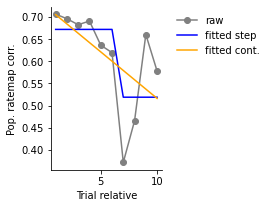

In [235]:
fig,ax=plt.subplots(figsize=(2,3))
xs_l = np.arange(len(xx)) + 1
ax.plot(xs_l,xx,label='raw',marker='o',color='grey')
ax.plot(xs_l,xx_hat_step,label='fitted step',color='blue')
ax.plot(xs_l,xx_hat_reg, label='fitted cont.',color='orange')
ax.legend(bbox_to_anchor=[1.05,1.],frameon=False)
ax.set_xlabel('Trial relative')
ax.set_ylabel('Pop. ratemap corr.')
sns.despine()
figfn = 'example_pvcorr_vs_triallag_with_step_and_continuous_fit'
# ph.save_given_name(fig,figfn,figdir)


In [243]:
from statsmodels.tsa.ar_model import AutoReg

# Fit the model
data=xx
model = AutoReg(data, lags=1)  # AR(1) model
results = model.fit()

# Get the parameters
params = results.params
print("Parameters:", params)

# Calculate R-squared
predictions = results.predict(start=0, end=len(data) - 1, dynamic=False)
r_squared = 1 - (sum((predictions[1:] - data[1:])**2) / sum((data[1:] - data[1:].mean())**2))
print("R-squared:", r_squared)



Parameters: [0.33916905 0.42475504]
R-squared: 0.19655772750591194


In [248]:
predictions

array([       nan, 0.63922332, 0.63481629, 0.62907754, 0.63260852,
       0.60948167, 0.60231409, 0.49714976, 0.53699684, 0.61969905])

In [249]:
data

array([0.70641722, 0.69604175, 0.68253102, 0.690844  , 0.63639651,
       0.6195219 , 0.37193371, 0.46574562, 0.66045128, 0.57790129])

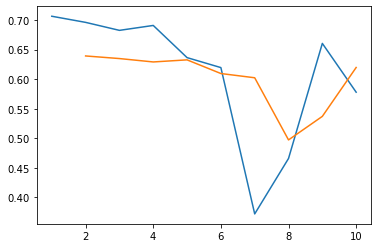

In [247]:
plt.plot(xs_l,data)
plt.plot(xs_l[1:],predictions[1:])

In [241]:
predictions

array([       nan, 0.63922332, 0.63481629, 0.62907754, 0.63260852,
       0.60948167, 0.60231409, 0.49714976, 0.53699684, 0.61969905])

In [239]:
predictions

array([0.58463553, 0.58749593, 0.5887109 , 0.58922697, 0.58944617,
       0.58953928, 0.58957882, 0.58959562, 0.58960276, 0.58960579])

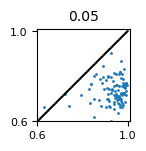

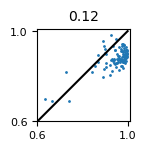

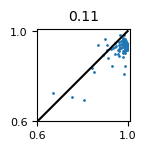

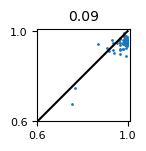

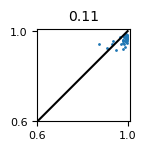

In [76]:
# fig,axs=plt.subplots(5,1,figsize=(4,20))
dosave = True
for ii,order in enumerate(r2_df_pv.columns.get_level_values(0).unique()):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    ax.set_aspect('equal')
    ax.scatter(r2_df_pv.loc[:,(order,'reg')],r2_df_pv.loc[:,(order,'step')],s=1)
    ax.plot([0.6,1],[0.6,1],color='k')
    ax.set_xlim([0.6,1.01])
    ax.set_ylim([0.6,1.01])
    ax.set_xticks([0.6,1])
    ax.set_yticks([0.6,1])
    
    frac_step_larger = (r2_df_pv.loc[:,(order,'step_minus_reg')].dropna() > 0).mean()
        
#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac:.2f}')
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
    ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
    ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_xlabel('R2 polynomial regression')
#     ax.set_ylabel('R2 change point model')
    if dosave:
        figfn = f'scatter_R2_cpd_vs_polyreg_order{order}_popveccorr'
        ph.save_given_name(fig,figfn,figdir,dpi=900)


# analysis of how many trials it take to switch

## get peri switch trials

In [160]:
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

### idea: how many trials are lapsed from the valley pre switch and peak post switch

In [354]:
ii = 51
changes_df_row = changes_df_one.iloc[ii].dropna()
X_raw_row = X_raw_one.iloc[ii].dropna()
span_d = svga.get_peri_switch_peak_valley_span(changes_df_row,X_raw_row)
peri_sw_x_one=svga.get_peri_switch_x_raw(changes_df_row,X_raw_row,win=10)

In [68]:
%%time
span_d_all = svga.get_peri_switch_peak_valley_span_all(X_raw_all,changes_df_all)
data_fn=os.path.join(data_dir,'peri_switch_peak_valley_span.p')
pickle.dump(span_d_all,open(data_fn,'wb'))

CPU times: user 17.4 s, sys: 215 ms, total: 17.6 s
Wall time: 17.6 s


In [80]:
data_fn=os.path.join(data_dir,'peri_switch_peak_valley_span.p')
span_d_all=pickle.load(open(data_fn,'rb'))

onoff 1, <=1: 0.23586206896551723
onoff 1, <=2: 0.5880459770114943
onoff 1, <=3: 0.833103448275862
onoff 1, <=4: 0.9429885057471264
onoff -1, <=1: 0.31461538461538463
onoff -1, <=2: 0.6484615384615384
onoff -1, <=3: 0.8669230769230769
onoff -1, <=4: 0.9607692307692308


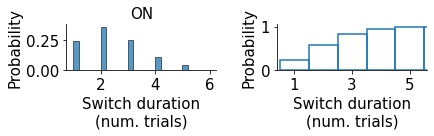

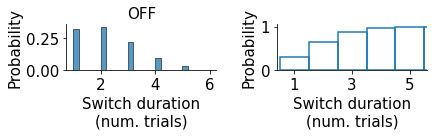

In [74]:

for onoff in [1,-1]:
    fig=plt.figure(figsize=(6,2))
    ax=fig.add_subplot(1,2,1)
    bins = np.arange(1,6.2,0.2)
    ax=sns.histplot(data=span_d_all.loc[onoff],x='trial span',bins=bins,ax=ax,stat='probability')
    sns.despine()
    onoff_str = {1:'ON',-1:'OFF'}[onoff]
    ax.set_title(onoff_str)
    ax.set_xlabel('Switch duration\n(num. trials)')
    
    ax=fig.add_subplot(1,2,2)
    bins = np.arange(1,11,1)
    ax=sns.histplot(data=span_d_all.loc[onoff],x='trial span', bins=bins,ax=ax,cumulative=True,stat='probability',fill=False)
    ax.set_xlim([0.9,6.1])
    ax.set_xticks([1.5,3.5,5.5])
    ax.set_xticklabels([1,3,5])
    sns.despine()
    ax.set_xlabel('Switch duration\n(num. trials)')
    plt.tight_layout()
    
    for k in range(1,5):
        p=(span_d_all.loc[onoff]['trial span'] <=k).mean()
        print(f'onoff {onoff}, <={k}: {p}')
    
    figfn = f'hist_switch_duration_{onoff}'
    ph.save_given_name(fig,figfn,figdir)


## examples of trial span

In [77]:
ani = 'e15_13f1'
sess = 'e15_13f1_220117'

In [78]:
per_field_metrics_one=per_field_metrics_all.loc[ani,sess,ta]
fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
X_raw = X_raw_all.loc[(ani,sess),:]
X_pwc=X_pwc_all.loc[(ani,sess),:]
all_sw_d=all_sw_d_all.loc[(ani,sess),:]
trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df_all.loc[(ani,sess),:])

ind_given_si=per_field_metrics_one.query('si > 0.5').index
ta=0

/tmp/ipykernel_2060823/113494510.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_one=per_field_metrics_all.loc[ani,sess,ta]
/tmp/ipykernel_2060823/113494510.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
/tmp/ipykernel_2060823/113494510.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/113494510.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc=X_pwc_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/113494510.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d=all_sw_d_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/113494510.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialty

In [83]:
from matplotlib.ticker import MaxNLocator

/tmp/ipykernel_2060823/2519829344.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
/tmp/ipykernel_2060823/2519829344.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/mnt/home/szheng/projects/util_code/plot_helper.py:574: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)
/tmp/ipykernel_2060823/2519829344.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2060823/2519829344.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
/tmp/ipykernel_2060823/2519829344.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_

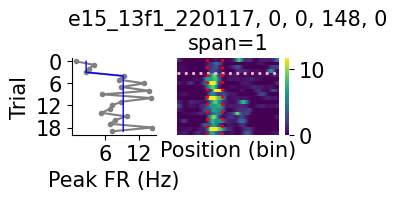

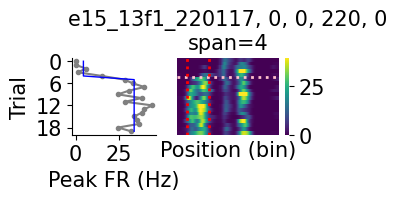

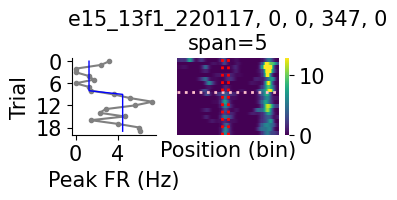

In [107]:
import plot_all_fr_map_x_pwc_one_session as plotfm
reload(plotfm)

dosave=True

ii_ts_l = [(2,1),(2,4),(0,5)] # which index, with a given trial span

for (ii,ts) in ii_ts_l:
    ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
    ind_given_trialspan=ma.reset_index(level=-1,drop=True).index[ma]


    ind_left=ind_given_trialspan.intersection(ind_given_si)

    tt,uid,field_id=ind_left[ii]

    all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
    all_fields_row_one=all_fields_recombined.loc[ta,tt,uid,field_id]

    fig,axs=plotfm.plot_ratemap_fr_one_field(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,
                                trial_index_to_index_within_df,
                                save_fig_fn = None,
                                close_fig = False,
                                vmax_clip_quantile=0.99,
                                vmax_relative_to_field=False,
                                fig=None,axs=None,figsize=(3,1),do_legend=False,
                                             plot_kws={'ms':3.,'pwc_linewidth':1}
                                )
    title=f'{sess}, {ta}, {int(tt)}, {uid}, {field_id}\nspan={ts}'
    axs[1].set_title(title)
    axs[1].set_xticks([])
    axs[0].yaxis.set_major_locator(MaxNLocator(nbins=4,integer=True))
    axs[0].xaxis.set_major_locator(MaxNLocator(nbins=2,integer=True))
    plt.tight_layout()
    if dosave:
        figfn=f'switch_duration_ex_span{ts}_{ii}'
        ph.save_given_name(fig,figfn,figdir)



/tmp/ipykernel_858163/403635535.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
/tmp/ipykernel_858163/403635535.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_858163/403635535.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
/tmp/ipykernel_858163/403635535.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[(ani,sess),:]
/tmp/ipykernel_858163/403635535.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc=X_pwc_all.loc[(ani,sess),:]
/tmp/ipykernel_858163/403635535.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d=all_sw_d_all.loc[(ani,sess),:]
/tmp/ipykernel_8581

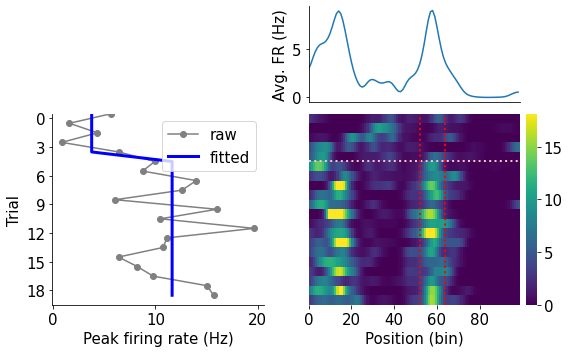

In [138]:
# # one example
# ii=9

# ta=0
# ts = 2

# ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
# ind_given_trialspan=ma.reset_index(level=-1,drop=True).index[ma]
# ind_given_si=per_field_metrics_one.query('si > 0.5').index

# ind_left=ind_given_trialspan.intersection(ind_given_si)

# tt,uid,field_id=ind_left[ii]

# import plot_all_fr_map_x_pwc_one_session as plotfm
# all_fields_row_one=all_fields_recombined.loc[ta,tt,uid,field_id]

# fig,axs=plotfm.plot_ratemap_fr_one_field_avgfm(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,
#                             trial_index_to_index_within_df,
#                             save_fig_fn = None,
#                             close_fig = False,
#                             vmax_clip_quantile=0.99,
#                             vmax_relative_to_field=False,
#                             fig=None,axs=None,figsize=(6*1.3,4*1.2)
#                             )


In [64]:
dd = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data'
# dd = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data'
fn_test=os.path.join(dd,'sw_res_afterheadscan_fr_mean.p')
res_test=pickle.load(open(fn_test,'rb'))

In [67]:
gasam.main('/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/',force_reload=True,load_only=False,dosave=True)


/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---


/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/switch_analysis/all_sw_info.p


{'all_sw_d':       trialtype  uid  field_index          time  speed_gauss  field_pos  \
 0 0        both  305            0   6918.271296     2.533582   3.740768   
   1        both   74            0   6970.094439    27.147425  20.859440   
   2        both  128            0   6963.678153     7.642066   3.039415   
   3         0.0   45            2   7097.330444    26.535218  95.875781   
   4         0.0  266            2   7078.870151    13.119677  67.115868   
 ...         ...  ...          ...           ...          ...        ...   
 1 217       1.0  319            3  22680.784099    22.570860  68.071959   
   218      both   84            0  22642.060494     8.713831   4.224583   
   219      both  276            0  22646.101542     3.707480   6.179972   
   220      both  283            0  22643.124781     2.112865   4.958388   
   221      both  312            0  22644.773936     1.997404   5.563925   
 
        trial_index  switch  index_within  switch_trial  switch_trial_frac

In [204]:
bad_sess=[]
for ddf in subdb['data_dir_full']:
    pfres_test=pfrc.main(ddf,dosave=False,force_reload=False,load_only=True)
    fr_mean=pfres_test['params_recombined'].loc['fr_mean']
    if not np.all(fr_mean.columns==fr_mean.sort_index(axis=1).columns):
        bad_sess.append(ddf)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_after

<Axes: >

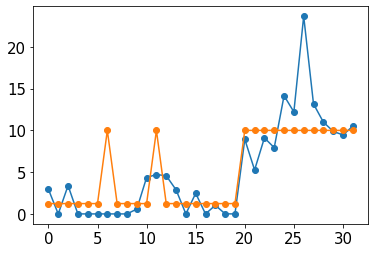

In [134]:
X_raw_all.loc[ani,sess,ta,tt,uid,field_id].dropna().plot(marker='o')
X_pwc_all.loc[ani,sess,ta,tt,uid,field_id].dropna().plot(marker='o')

## measure expected number of trial span
pre post difference (peri-switch valley peak FR difference) / sqrt(mean residual squared)



In [85]:
per_field_metrics_all['resid2_mean_sqrt'] = np.sqrt(per_field_metrics_all['resid2_mean'])

In [86]:
span_d_all_with_resid2 = span_d_all.reset_index(level=(0,-1)).join(per_field_metrics_all['resid2_mean_sqrt']).set_index(['onoff','level_7'],append=True).reorder_levels((-2,0,1,2,3,4,5,7))



In [94]:
expected_span = np.abs(span_d_all_with_resid2['post_minus_pre'] / (span_d_all_with_resid2['resid2_mean_sqrt'] *2)) 
span_d_all_with_resid2['expected_span'] = expected_span

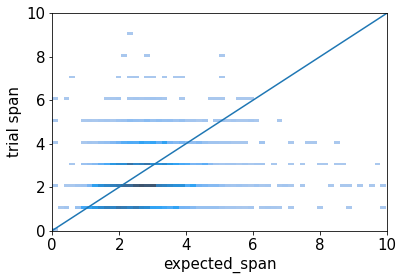

In [105]:
# ax=sns.scatterplot(data=span_d_all_with_resid2,x='expected_span',y='trial span',s=1)
ax=sns.histplot(data=span_d_all_with_resid2,x='expected_span',y='trial span')
ax.set_ylim([0,10])
ax.set_xlim([0,10])
ax.plot([0,1],[0,1],transform=ax.transAxes)

<Axes: >

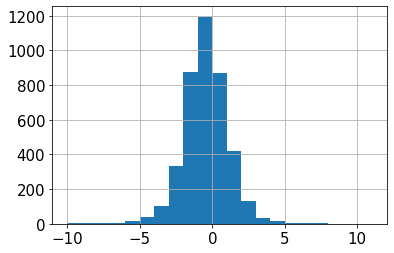

In [115]:
diff=span_d_all_with_resid2['trial span'] - span_d_all_with_resid2['expected_span']
bins=[-10,-5,0,5,10]
bins=np.arange(-10,10+2,1)
diff.hist(bins=bins)

In [117]:
diff.mean()/diff.std()

-0.2530544804668924

<Axes: >

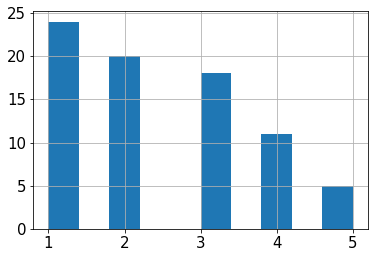

In [367]:
span_d_one.query('onoff==1')['trial span'].hist()

<Axes: >

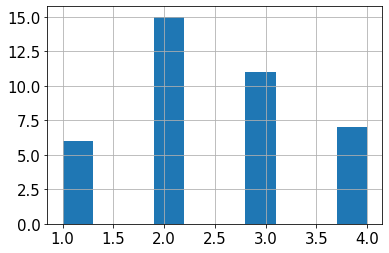

In [368]:
span_d_one.query('onoff==-1')['trial span'].hist()

In [327]:
import numpy as np
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k):
    y = L / (1 + np.exp(-k*(x-x0)))
    return y

def fit_sigmoid(xdata, ydata):
    # Initial guess for the parameters
    initial_guess = [max(ydata), np.median(xdata), 1]

    # Curve fitting
    params, pcov = curve_fit(sigmoid, xdata, ydata, p0=initial_guess, method='dogbox')
    
    return params,pcov

# Example usage
xdata = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ydata = np.array([0.01, 0.03, 0.1, 0.2, 0.5, 0.8, 0.9, 0.97, 0.99, 0.999])

params,pcov = fit_sigmoid(xdata, ydata)
print("Fitted parameters: L = {}, x0 = {}, k = {}".format(*params))


Fitted parameters: L = 0.9934245468990771, x0 = 3.9845182675472732, k = 1.2706321891719363


[13.80321874  8.60388498  1.47781184]


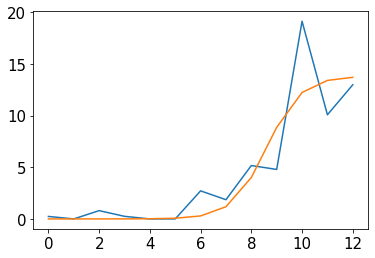

In [332]:
ydata=peri_sw_x_one.iloc[0]

xs=np.arange(len(ydata))
params,pcov=fit_sigmoid(xs,ydata.values)
y_hat=sigmoid(xs,*params)
plt.plot(xs,ydata)
plt.plot(xs,y_hat)
print(params)

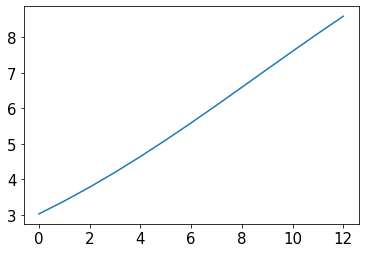

In [335]:
y_hat=sigmoid(xs,params[0],params[1],params[2]*0.1)

plt.plot(xs,y_hat)


In [280]:
peri_sw_x_one

,13,15,17,18,20,21,23,24,26,27
0,0.01155,0.0,0.0,9.564084,2.748094,14.884641,13.415141,11.795851,7.455039,13.696731


In [279]:
changes_df_row

0     0.0
2     0.0
4     0.0
6     0.0
11    0.0
12    0.0
13    0.0
15    0.0
17    0.0
18    0.0
20    0.0
21    1.0
23    0.0
24    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: (32, 1), dtype: float64

[11.93902662  3.24395274  1.2759813 ]


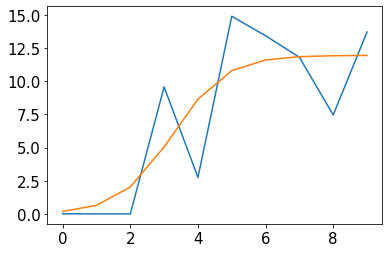

In [271]:
ydata=peri_sw_x_one.iloc[0][1:-1]

xs=np.arange(len(ydata))
params=fit_sigmoid(xs,peri_sw_x_one.iloc[0].values)
y_hat=sigmoid(xs,*params)
plt.plot(xs,ydata)
plt.plot(xs,y_hat)
print(params)

In [244]:
next_sw

20

In [250]:
peri_sw_x

,13,15,17,18,20,21,23,24,26,27
0,0.01155,0.0,0.0,9.564084,2.748094,14.884641,13.415141,11.795851,7.455039,13.696731


In [222]:
sw_trials

array([11])

In [210]:
X_pwc

0          1          2          3          4   \
0 0.0  31  1  11.860302        NaN  11.860302        NaN  11.860302   
       32  1   1.434035        NaN   1.434035        NaN   1.434035   
       34  0   4.093238        NaN   4.093238        NaN   4.093238   
       35  1   3.495219        NaN   3.495219        NaN   3.495219   
       36  0   8.683220        NaN   8.683220        NaN   8.683220   
...                 ...        ...        ...        ...        ...   
  both 363 0   7.453740   7.453740   7.453740   7.453740   7.453740   
       368 0   4.221207   4.221207   4.221207   4.221207   4.221207   
       370 0   1.875981   1.875981   1.875981   1.875981   1.875981   
       374 0  15.428028  15.428028  15.428028  15.428028  15.428028   
       376 0  16.181012  16.181012  16.181012  16.181012  16.181012   

                     5          6          7          8          9   ...  60  \
0 0.0  31  1        NaN  11.860302        NaN        NaN        NaN  ... NaN   
       32  1        NaN   1.434035        NaN        NaN        NaN  ... NaN   
       34  0        NaN   4.093238        NaN        NaN        NaN  ... NaN   
       35  1        NaN   3.495219        NaN        NaN        NaN  ... NaN   
       36  0        NaN   8.683220        NaN        NaN        NaN  ... NaN   
...                 ...        ...        ...        ...        ...  ...  ..   
  both 363 0   7.453740   7.453740   7.453740   7.453740   7.453740  ... NaN   
       368 0   4.221207   4.221207   4.221207   4.221207   4.221207  ... NaN   
       370 0   1.875981   1.875981   1.875981   1.875981   1.875981  ... NaN   
       374 0  15.428028  15.428028  15.428028  15.428028  15.428028  ... NaN   
       376 0  16.181012  16.181012  16.181012  16.181012   4.735479  ... NaN   

              61  62  63  64  65  66  67  68  69  
0 0.0  31  1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       32  1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       34  0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       35  1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       36  0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...           ..  ..  ..  ..  ..  ..  ..  ..  ..  
  both 363 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       368 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       370 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       374 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       376 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[682 rows x 70 columns]

In [209]:
X_pwc_all

0          1          2   \
e13_26m1 e13_26m1_210913 0 0.0  3  0        NaN   1.389282        NaN   
                                27 0        NaN  33.067719        NaN   
                                29 0        NaN  10.396074        NaN   
                                   1        NaN  26.288630        NaN   
                                   2        NaN  17.481232        NaN   
...                                         ...        ...        ...   
e14_2m3  e14_2m3_201118  0 both 30 0   8.682727   8.682727   8.682727   
                                32 0  11.835044  11.835044  11.835044   
                                38 0   9.374712   9.374712   9.374712   
                                47 0   6.453665   6.453665   6.453665   
                                53 0   3.517027   3.517027   3.517027   

                                             3          4          5   \
e13_26m1 e13_26m1_210913 0 0.0  3  0   1.389282        NaN        NaN   
                                27 0  33.067719        NaN        NaN   
                                29 0  10.396074        NaN        NaN   
                                   1  26.288630        NaN        NaN   
                                   2  17.481232        NaN        NaN   
...                                         ...        ...        ...   
e14_2m3  e14_2m3_201118  0 both 30 0   8.682727   8.682727   8.682727   
                                32 0  11.835044  11.835044  11.835044   
                                38 0   9.374712   9.374712   9.374712   
                                47 0   6.453665   6.453665   6.453665   
                                53 0   3.517027   3.517027   3.517027   

                                             6          7          8   \
e13_26m1 e13_26m1_210913 0 0.0  3  0   1.389282        NaN   1.389282   
                                27 0  33.067719        NaN  33.067719   
                                29 0  10.396074        NaN  10.396074   
                                   1  26.288630        NaN  26.288630   
                                   2  17.481232        NaN  17.481232   
...                                         ...        ...        ...   
e14_2m3  e14_2m3_201118  0 both 30 0   8.682727   8.682727   8.682727   
                                32 0  11.835044  11.835044  11.835044   
                                38 0   9.374712   9.374712   9.374712   
                                47 0   6.453665   6.453665   6.453665   
                                53 0   3.517027   3.517027   3.517027   

                                             9   ...  60         61  62  \
e13_26m1 e13_26m1_210913 0 0.0  3  0        NaN  ... NaN   4.305191 NaN   
                                27 0        NaN  ... NaN  33.067719 NaN   
                                29 0        NaN  ... NaN   2.777060 NaN   
                                   1        NaN  ... NaN  26.288630 NaN   
                                   2        NaN  ... NaN  17.481232 NaN   
...                                         ...  ...  ..        ...  ..   
e14_2m3  e14_2m3_201118  0 both 30 0   8.682727  ... NaN        NaN NaN   
                                32 0  11.835044  ... NaN        NaN NaN   
                                38 0   9.374712  ... NaN        NaN NaN   
                                47 0   6.453665  ... NaN        NaN NaN   
                                53 0   3.517027  ... NaN        NaN NaN   

                                             63  64         65  66  67  \
e13_26m1 e13_26m1_210913 0 0.0  3  0   4.305191 NaN   4.305191 NaN NaN   
                                27 0  33.067719 NaN  33.067719 NaN NaN   
                                29 0   2.777060 NaN   2.777060 NaN NaN   
                                   1  26.288630 NaN  26.288630 NaN NaN   
                                   2  17.481232 NaN  17.481232 NaN NaN   
...                                         ...  ..        ...  ..  .